# Sample Data

In [1]:
import pandas as pd

census = {'height' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
          'weight' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
          'Gender' : ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
         }

census_df = pd.DataFrame(census)
census_df

,height,weight,Gender
0,158,64,Male
1,170,86,Male
2,183,84,Male
3,191,80,Male
4,155,49,Female
5,163,59,Female
6,180,67,Female
7,158,54,Female
8,178,67,Female


# Data Visualisation

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for g,d in census_df.groupby('Gender'):
    ax.scatter(d['height'], d['weight'], label=g)
    
plt.legend(loc='upper left')
plt.title ('Height vs Weight')
plt.xlabel('Height (cm))')
plt.ylabel('Weight (kg))')
plt.grid(True)
plt.show()
    

<Figure size 640x480 with 1 Axes>

# Preprocessing Data

In [3]:
import numpy as np
X_train = np.array(census_df[['height', 'weight']])
y_train = np.array(census_df['Gender'])

print(f"X_train = {X_train}")
(f"y_train = {y_train}")

X_train = [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]


"y_train = ['Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female']"

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
y_train = y_train.flatten()
y_train

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

# KNN classifier, Gender prediction

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
new_height = 155
new_weight = 70
X_new = np.array([new_height, new_weight]).reshape(1,-1)

y_new = model.predict(X_new)
lb.inverse_transform(y_new)

array(['Female'], dtype='<U6')

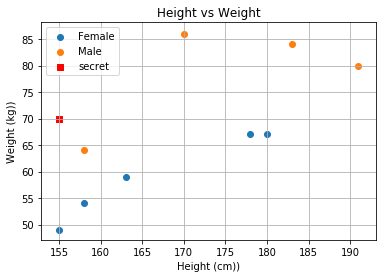

In [8]:
fig, ax = plt.subplots()

for g, d in census_df.groupby('Gender'):
    ax.scatter(d['height'], d['weight'], label=g)

plt.scatter(new_height, new_weight, marker='s', color = 'r', label='secret')

plt.legend(loc='upper left')
plt.title ('Height vs Weight')
plt.xlabel('Height (cm))')
plt.ylabel('Weight (kg))')
plt.grid(True)
plt.show()

In [9]:
# Euclidian distance

# Evaluation for KNN

In [10]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169,67]])
y_test = lb.transform(np.array(['Male', 'Male', 'Female', 'Female'])).flatten()

print(y_test)

[1 1 0 0]


In [11]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc}")
#accuracy is proportion which classified correctly

Accuracy = 0.75


In [13]:
from sklearn.metrics import precision_score
#Proportion predicted to be positive that are truly positive 

# Classification Report

In [14]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f"Classification Report = {cls_report}")

Classification Report =               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

